This example script aims to view/visualize the trade balance using getTradeBalance function

In [ ]:
# Install a pip comtradeapicall package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall
# Install a pip pandas package in the current Jupyter kernel
!{sys.executable} -m pip install pandas
# Install a pip matplotlib package in the current Jupyter kernel
!{sys.executable} -m pip install matplotlib
# Install a pip load_dotenv package in the current Jupyter kernel
!{sys.executable} -m pip install load_dotenv
# Install a pip plotly package in the current Jupyter kernel
!{sys.executable} -m pip install plotly

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

In [ ]:
# use .env to store the subscription key
from dotenv import load_dotenv
import os

load_dotenv()
subscription_key = os.getenv("SUBSCRIPTION_KEY")

Input parameters: reporter code in ISO, base year (to obtain the top products), flow and no of months

In [ ]:
# get the latest year
from datetime import datetime
baseYear = datetime.now().year-1

In [ ]:
# get availability of reporters for baseYear
df_availablereporters = comtradeapicall.getFinalDataAvailability(
    subscription_key=subscription_key, typeCode='C', freqCode='A', clCode='HS', reporterCode=None, period=baseYear)

In [ ]:
# get random reporter
countryISO = df_availablereporters['reporterISO'].sample(
    n=1, random_state=None).iloc[0]

In [87]:
# get the top 4 digits exported commodities
# classic breakdown mode will set the partner2Code to World, customsCode to Total, and motCode to Total.
df_TradeBalance = comtradeapicall.getTradeBalance(subscription_key, typeCode='C', freqCode='A', clCode='HS', period=baseYear, reporterCode=comtradeapicall.convertCountryIso3ToCode(
    countryISO), cmdCode='TOTAL', partnerCode=None, partner2Code=None, customsCode=None, motCode=None, breakdownMode='classic', includeDesc=True)

In [ ]:
# calculate top and bottom trade balances
df_TradeBalance_top5 = df_TradeBalance[df_TradeBalance['partnerCode'] != 0].sort_values(
    by='primaryValueBal', ascending=False).head(5)[['reporterDesc', 'period', 'partnerDesc', 'primaryValueBal']]
df_TradeBalance_bottom5 = df_TradeBalance[df_TradeBalance['partnerCode'] != 0].sort_values(
    by='primaryValueBal', ascending=True).head(5)[['reporterDesc', 'period', 'partnerDesc', 'primaryValueBal']]

# Convert trade balance to billions
df_TradeBalance_bottom5['primaryValueBal'] = df_TradeBalance_bottom5['primaryValueBal'] / 1e9
df_TradeBalance_top5['primaryValueBal'] = df_TradeBalance_top5['primaryValueBal'] / 1e9

# Get Reporter and Year
reporter = str(df_TradeBalance_top5['reporterDesc'].iloc[0])
period = str(df_TradeBalance_top5['period'].iloc[0])

<Figure size 1200x600 with 0 Axes>

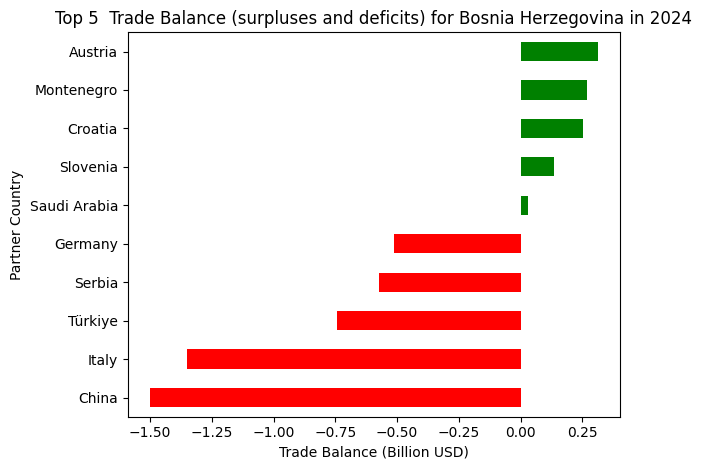

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get bottom 5 deficits (most negative balances)
bottom5_deficit = df_TradeBalance_bottom5.sort_values(
    by='primaryValueBal', ascending=True)

# Get top 5 surpluses (largest positive balances)
top5_surplus = df_TradeBalance_top5.sort_values(
    by='primaryValueBal', ascending=True)

# Combine with deficits first, then surpluses
combined = pd.concat([bottom5_deficit, top5_surplus], ignore_index=True)

# Assign colors: red for deficits, green for surpluses
colors = ['red'] * len(bottom5_deficit) + ['green'] * len(top5_surplus)

# Plot horizontal bar chart using pandas built-in plot()
plt.figure(figsize=(12, 6))
combined.plot(x='partnerDesc', y='primaryValueBal',
              kind='barh', color=colors, legend=False)
plt.title('Top 5  Trade Balance (surpluses and deficits) for ' +
          reporter+' in ' + period)
plt.xlabel('Trade Balance (Billion USD)')
plt.ylabel('Partner Country')
plt.tight_layout()